# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_data = []
url = "http://api.openweathermap.org/data/2.5/weather?"

for i in range(len(cities)):
    new_city = {}
    city = cities[i]
    query_url = url + "appid=" + weather_api_key + "&units=imperial&q=" + city
    try:
        response = requests.get(query_url).json()
        new_city['Name'] = response['name']
        new_city['Temperature'] = response['main']['temp']
        new_city['Humidity'] = response['main']['humidity']
        new_city['Latitude'] = response['coord']['lat']
        new_city['Longitude'] = response['coord']['lon']
        new_city['Cloudiness'] = response['clouds']['all']
        new_city['Wind Speed'] = response['wind']['speed']
        print(f"Processing Record {i} | {new_city['Name']}")
        city_data.append(new_city)
    except:
        print('City not found. Skipping...')

Processing Record 0 | Ribeira Brava
Processing Record 1 | Khatanga
Processing Record 2 | Saint-Paul
Processing Record 3 | Saskylakh
Processing Record 4 | Puerto Ayora
Processing Record 5 | Sonegaon
Processing Record 6 | Ponta do Sol
Processing Record 7 | Port Elizabeth
City not found. Skipping...
Processing Record 9 | Rypefjord
Processing Record 10 | Boguchany
City not found. Skipping...
Processing Record 12 | San Ramon
Processing Record 13 | Rikitea
Processing Record 14 | Prome
Processing Record 15 | Moguer
City not found. Skipping...
Processing Record 17 | Hwange
Processing Record 18 | Vao
Processing Record 19 | Mataura
Processing Record 20 | Mae Sot
Processing Record 21 | Sayansk
Processing Record 22 | Chateaubelair
Processing Record 23 | Iracoubo
Processing Record 24 | Arraial do Cabo
Processing Record 25 | Avarua
Processing Record 26 | Torbay
Processing Record 27 | Grado
Processing Record 28 | Dikson
Processing Record 29 | Calbuco
Processing Record 30 | Griffith
City not found. Sk

Processing Record 251 | Saldanha
Processing Record 252 | Margherita
Processing Record 253 | Port Blair
Processing Record 254 | Kumul
Processing Record 255 | Senneterre
Processing Record 256 | Flinders
Processing Record 257 | Sakaiminato
Processing Record 258 | Alugan
Processing Record 259 | Manakara
Processing Record 260 | Safi
Processing Record 261 | Lebu
Processing Record 262 | San Patricio
Processing Record 263 | Xinpu
Processing Record 264 | East London
Processing Record 265 | Hofn
Processing Record 266 | Fortuna
Processing Record 267 | Moyale
Processing Record 268 | Vryburg
Processing Record 269 | Saint George
Processing Record 270 | Kolār
Processing Record 271 | Eyl
Processing Record 272 | Labuhan
Processing Record 273 | Hilo
City not found. Skipping...
Processing Record 275 | Yamada
Processing Record 276 | Biak
Processing Record 277 | Elbistan
Processing Record 278 | Necochea
Processing Record 279 | Jegunovce
Processing Record 280 | Meulaboh
Processing Record 281 | Dayong
Proces

Processing Record 501 | Natchitoches
Processing Record 502 | Saint-François
Processing Record 503 | Mayumba
Processing Record 504 | San Matías
Processing Record 505 | Bathsheba
Processing Record 506 | Taksimo
Processing Record 507 | City of San Pedro
Processing Record 508 | The Valley
Processing Record 509 | Whitecourt
Processing Record 510 | Chara
Processing Record 511 | Misratah
Processing Record 512 | Impfondo
City not found. Skipping...
Processing Record 514 | Togur
Processing Record 515 | Mergen
Processing Record 516 | Ferrol
Processing Record 517 | Ouallam
Processing Record 518 | Sørland
Processing Record 519 | Torit
Processing Record 520 | Irpa Irpa
Processing Record 521 | Takāb
Processing Record 522 | Zhigansk
Processing Record 523 | Omsukchan
Processing Record 524 | Vágur
Processing Record 525 | Paita
Processing Record 526 | Sungai Raya
Processing Record 527 | Thunder Bay
Processing Record 528 | Pevek
City not found. Skipping...
Processing Record 530 | Vigia
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame(city_data)

In [5]:
cities_df.to_csv("CityWeather.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

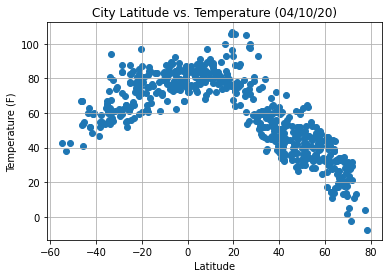

In [6]:
today = '04/10/20'
plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.grid(b=True)
plt.title(f"City Latitude vs. Temperature ({today})")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
output_file = "LatVsTemp.png"
plt.savefig(output_file)
plt.show()

#### Latitude vs. Humidity Plot

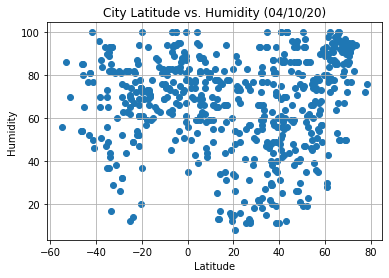

In [7]:
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.grid(b=True)
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
output_file = "LatVsHum.png"
plt.savefig(output_file)
plt.show()

#### Latitude vs. Cloudiness Plot

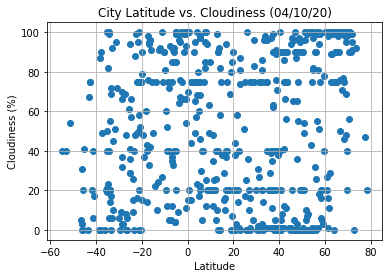

In [8]:
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.grid(b=True)
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
output_file = "LatVsCloud.png"
plt.savefig(output_file)
plt.show()

#### Latitude vs. Wind Speed Plot

In [9]:
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'])
plt.grid(b=True)
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
output_file = "LatVsWind.png"
plt.savefig(output_file)
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
def regressLat(dataframe, column, filename):     # plots given column against Latitude column of given DataFrame
    x_values = dataframe['Latitude']
    y_values = dataframe[column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10), xycoords = 'figure points',fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(column)
    plt.savefig(filename)
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
north_df = cities_df.loc[cities_df['Latitude'] >= 0 , :]
south_df = cities_df.loc[cities_df['Latitude'] < 0 , :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [12]:
regressLat(north_df, 'Temperature', "LatVsTempNorth.png")

The r-squared is: -0.887869230375082


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6863148307134056


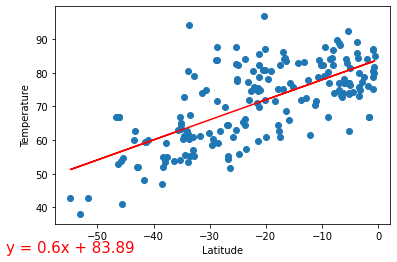

In [13]:
regressLat(south_df, 'Temperature', "LatVsTempSouth.png")

# There is a moderate to strong correlation between temperature and latitude, as expected.
# In the Northern Hemisphere this correlation appears as negative and in the Southern Hemisphere as positive,
# but this is just because Southern latitudes are expressed negatively; if latitudes are expressed in absolute values,
# the correlation is negative.
# This correlation is much stronger in the Northern Hemisphere, but that is probably because there are about twice as many data points there.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [14]:
regressLat(north_df, 'Humidity', "LatVsHumNorth.png")

The r-squared is: 0.26694587384803936


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22029426120546405


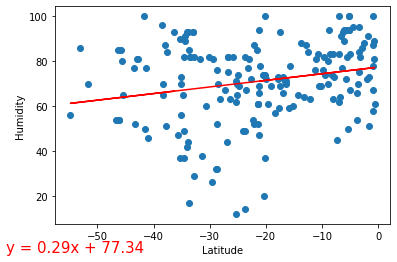

In [15]:
regressLat(south_df, 'Humidity', "LatVsTempSouth.png")

# There is only a very weak correlation between humidity and latitude, which is interesting. One might have guessed that
# humidity would be greater closer to the equator, but other factors seem to outweigh this.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21847733920835455


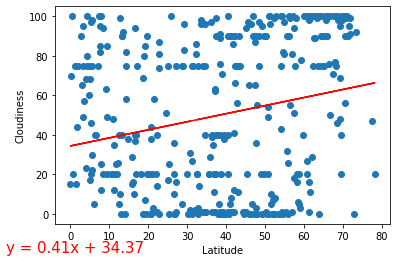

In [16]:
regressLat(north_df, 'Cloudiness', "LatVsCloudNorth.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3946742472078616


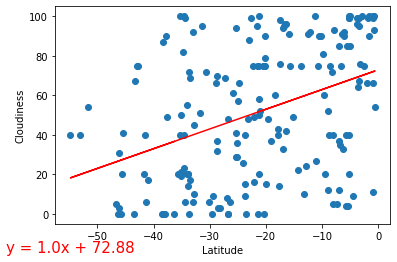

In [17]:
regressLat(south_df, 'Cloudiness', "LatVsCloudSouth.png")

# Here too there is not much correlation between cloudiness and latitude. There's a slightly stronger correlation 
# in the Southern Hemisphere than in the Northern, presumably because of season differences.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.237855971817475


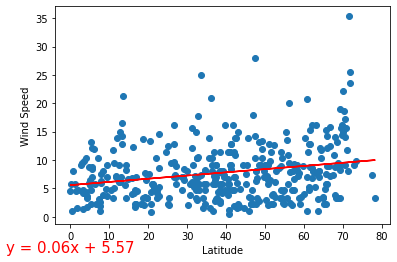

In [18]:
regressLat(north_df, 'Wind Speed', "LatVsWindNorth.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.25562319551623724


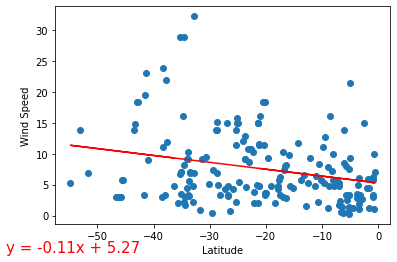

In [19]:
regressLat(south_df, 'Wind Speed', "LatVsWindSouth.png")

# Here the signs are reversed as is the temperature charts, so maybe there really is a weak correlation 
# with wind speeds rising nearer the poles.